# Customer Analytics and AB Testing in Python

## Course Description

The most successful companies today are the ones that know their customers so well that they can anticipate their needs. Customer analytics and in particular A/B Testing are crucial parts of leveraging quantitative know-how to help make business decisions that generate value. This course covers the ins and outs of how to use Python to analyze customer behavior and business trends as well as how to create, run, and analyze A/B tests to make proactive, data-driven business decisions.

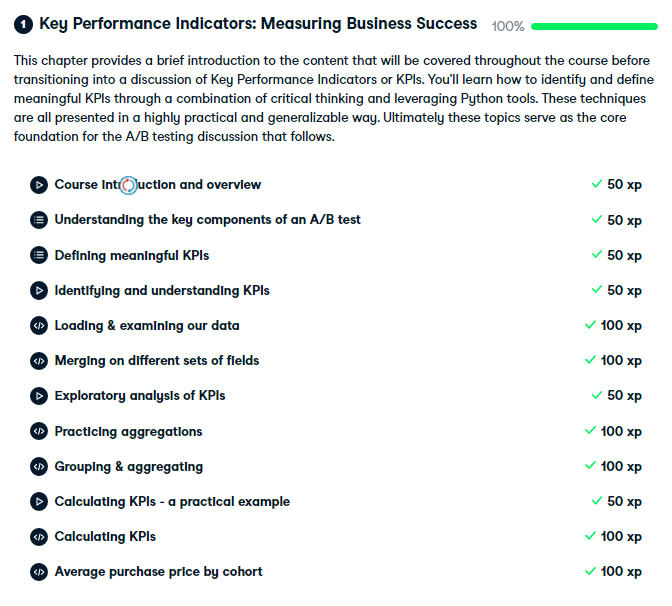

## 1_Key Performance Indicators: Measuring Business Success
### Course Introduction and overview

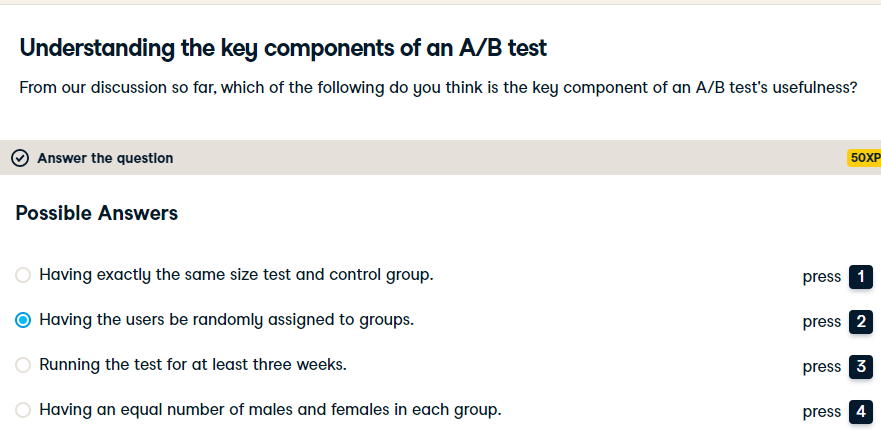

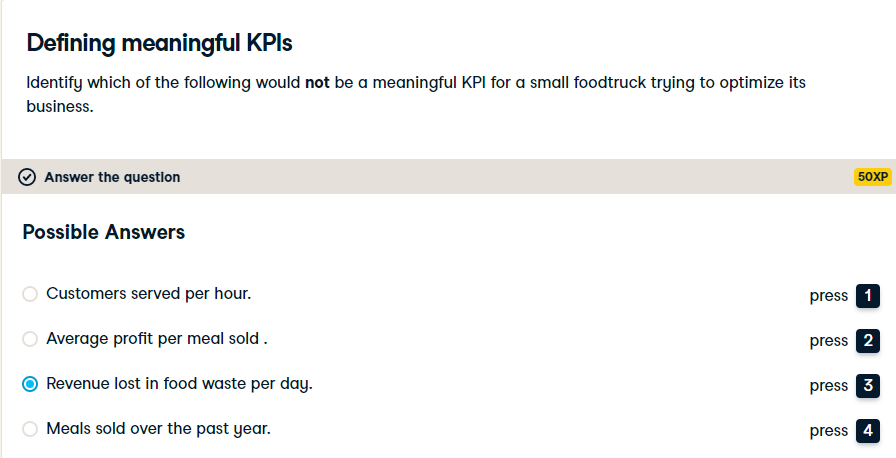

In [6]:
df_1 = pd.read_csv('customer_data.csv')
df_1.head(1)

,uid,reg_date,device,gender,country,age
0,54030035.0,2017-06-29T00:00:00Z,and,M,USA,19


In [7]:
df_2 = pd.read_csv('inapp_purchases.csv')
df_2.head(1)

,date,uid,sku,price
0,2017-07-10,41195147.0,sku_three_499,499.0


In [8]:
df_3 = pd.read_csv('User_Demographics_Paywall_dataset.csv')
df_3.head(1)

,uid,reg_date,device,gender,country,age
0,52774929,2018-03-07T00:00:00Z,and,F,FRA,27.0


In [9]:
df_4 = pd.read_csv('Daily_revenue_dataset.csv')
df_4.head(1)

,index,gender,device,revenue,date,country
0,1,male,ios,186557.0,2013-09-20T00:00:00Z,USA


In [10]:
df_5 = pd.read_csv('AB_Testing_Results.csv')
df_5.head(1)

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595.0,5.0,2016-03-08,GRP B,I


## 1_Key Performance Indicators: Measuring Business Success
### Identifying and understanding KPIs

#### Loading & examining our data

Let's begin by loading and examining two datasets: one that contains a set of user demographics and the other -- a set of data relating to in-app purchases for our meditation app.

**Instructions**

- Import pandas as pd.

- Load the file 'customer_data.csv' as a DataFrame called customer_data.

- Load the file 'inapp_purchases.csv' as a DataFrame called app_purchases.

- Print the columns of customer_data and then app_purchases using their .columns attribute.

In [12]:
# Import pandas 
import pandas as pd

# Load the customer_data
customer_data = pd.read_csv('customer_data.csv')

# Load the app_purchases
purchase_data = pd.read_csv('inapp_purchases.csv')

# Print the columns of customer data
print(customer_data.columns)

# Print the columns of app_purchases
print(purchase_data.columns)

Index(['uid', 'reg_date', 'device', 'gender', 'country', 'age'], dtype='object')
Index(['date', 'uid', 'sku', 'price'], dtype='object')


Great start! Notice that both datasets have a common 'uid' column. You can use this to merge them!

#### Merging on different sets of fields

As you saw in the previous exercise, both customer_data and app_purchases have a common 'uid' column that you can use to combine them. If you explored them further, you would discover that they also have a common date column that is named 'date' in app_purchases and 'reg_date' in customer_data.

In this exercise you will explore merging on both of these columns and looking at how this impacts your final results.

The two datasets from the previous exercise - customer_data and app_purchases- have been loaded for you, with 'reg_date' in customer_data renamed to 'date'.

**Instructions**

- Merge customer_data with app_purchases, combining on the 'uid' column.

- To look at purchases that happened on the date of registration, merge customer_data to app_purchases on 'uid' and 'date'.

In [3]:
# Merge on the 'uid' field
uid_combined_data = purchase_data.merge(customer_data, on=['uid'], how='inner')

# Examine the results 
print(uid_combined_data.head())
print(len(uid_combined_data))

         date         uid            sku  price              reg_date device  \
0  2017-07-10  41195147.0  sku_three_499  499.0  2017-06-26T00:00:00Z    and   
1  2017-07-15  41195147.0  sku_three_499  499.0  2017-06-26T00:00:00Z    and   
2  2017-11-12  41195147.0   sku_four_599  599.0  2017-06-26T00:00:00Z    and   
3  2017-09-26  91591874.0    sku_two_299  299.0  2017-01-05T00:00:00Z    and   
4  2017-12-01  91591874.0   sku_four_599  599.0  2017-01-05T00:00:00Z    and   

  gender country  age  
0      M     BRA   17  
1      M     BRA   17  
2      M     BRA   17  
3      M     TUR   17  
4      M     TUR   17  
9006


In [ ]:
# Merge on the 'uid' and 'date' field
uid_date_combined_data = app_purchases.merge(customer_data, on=['uid', 'date'], how='inner')

# Examine the results 
print(uid_date_combined_data.head())
print(len(uid_date_combined_data))

Awesome! Note our second result returned fewer rows compared to the first one - 35 compared to 9006! This is because there were fewer matches

### Practicing aggregations

It's time to begin exploring the in-app purchase data in more detail. Here, you will practice aggregating the dataset in various ways using the .agg() method and then examine the results to get an understanding of the overall data, as well as a feel for how to aggregate data using pandas.

Loaded for you is a DataFrame named purchase_data which is the dataset of in-app purchase data merged with the user demographics data from earlier.

Before getting started, it's good practice to explore this purchase_data DataFrame in the IPython Shell. In particular, notice the price column: you'll examine it further in this exercise.

**Instructions**

- Find the 'mean' purchase price paid across our dataset. Then examine the output before moving on.

- Now, use the .agg() method to find the 'mean' and 'median' prices together.

- Now, find the 'mean' and 'median' for both the 'price' paid and the 'age' of purchaser.

In [13]:
# Calculate the mean purchase price 
purchase_price_mean = purchase_data.price.agg('mean')

# Examine the output 
print(purchase_price_mean)

406.77259604707973


In [14]:
# Calculate the mean and median purchase price 
purchase_price_summary = purchase_data.price.agg(['mean', 'median'])

# Examine the output 
print(purchase_price_summary)

mean      406.772596
median    299.000000
Name: price, dtype: float64


In [17]:
purchase_data.columns

Index(['date', 'uid', 'sku', 'price'], dtype='object')

In [19]:
# Calculate the mean and median of price and age
purchase_summary = uid_combined_data.agg({'price': ['mean', 'median'], 'age': ['mean', 'median']})

# Examine the output 
print(purchase_summary)

             price        age
mean    406.772596  23.922274
median  299.000000  21.000000


Nicely done! Notice how the mean is higher than the median? This suggests that we have some users who are making a lot of purchases!

#### Grouping & aggregating

You'll be using .groupby() and .agg() a lot in this course, so it's important to become comfortable with them. In this exercise, your job is to calculate a set of summary statistics about the purchase data broken out by 'device' (Android or iOS) and 'gender' (Male or Female).

Following this, you'll compare the values across these subsets, which will give you a baseline for these values as potential KPIs to optimize going forward.

The purchase_data DataFrame from the previous exercise has been pre-loaded for you. As a reminder, it contains purchases merged with user demographics.

**Instructions**

- Group the purchase_data DataFrame by 'device' and 'gender' in that order.

- Aggregate grouped_purchase_data, finding the 'mean', 'median', and the standard deviation ('std') of the purchase price, in that order, across these groups.

- Examine the results. Does the mean differ drastically from the median? How much variability is in each group?

In [21]:
# Group the data 
grouped_purchase_data = uid_combined_data.groupby(by = ['device', 'gender'])

# Aggregate the data
purchase_summary = grouped_purchase_data.agg({'price': ['mean', 'median', 'std']})

# Examine the results
print(purchase_summary)

                    price                   
                     mean median         std
device gender                               
and    F       400.747504  299.0  179.984378
       M       416.237308  499.0  195.001520
iOS    F       404.435330  299.0  181.524952
       M       405.272401  299.0  196.843197


Awesome! These values provide a great summary of the customer data which will be useful as you move to optimizing the conversion rate.

#### Calculating KPIs

You're now going to take what you've learned and work through calculating a KPI yourself. Specifically, you'll calculate the average amount paid per purchase within a user's first 28 days using the purchase_data DataFrame from before.

This KPI can provide a sense of the popularity of different in-app purchase price points to users within their first month.

**Instructions**

- Subtract timedelta(days=28) from current_date to find the last date that we will count purchases from. The current_date variable has already been defined.

- Filter out all users in purchase_data who registered in the last 28 days. That is, users whose purchase_data.reg_date is less than max_purchase_date.

- 

In [37]:
# Compute max_purchase_date 

from pandas import Timestamp
from datetime import timedelta
current_date = pd.to_datetime('2018-3-17')

max_purchase_date = current_date - timedelta(days=28)

In [36]:
# Filter to only include users who registered before our max date
purchase_data_filt = purchase_data[purchase_data.reg_date < max_purchase_date]

TypeError: Invalid comparison between dtype=datetime64[ns, UTC] and Timestamp

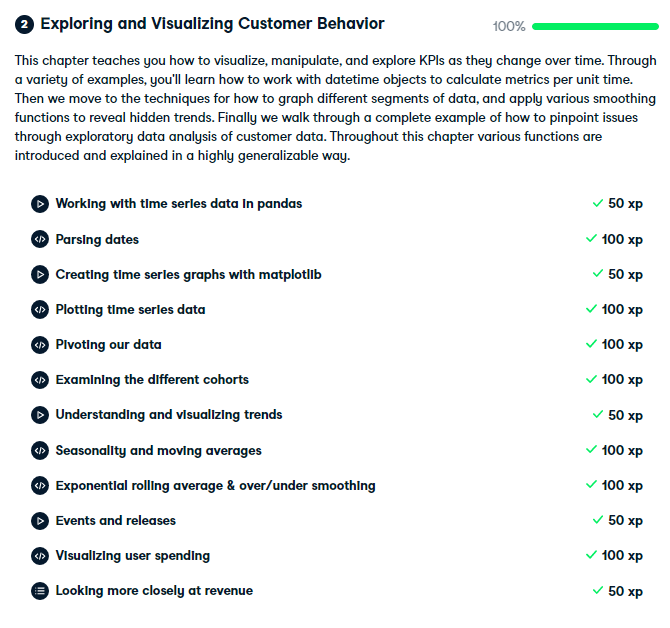

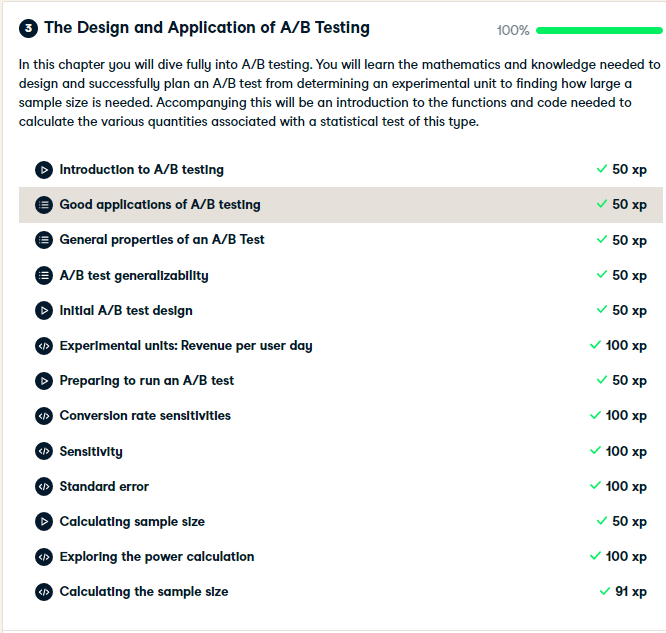

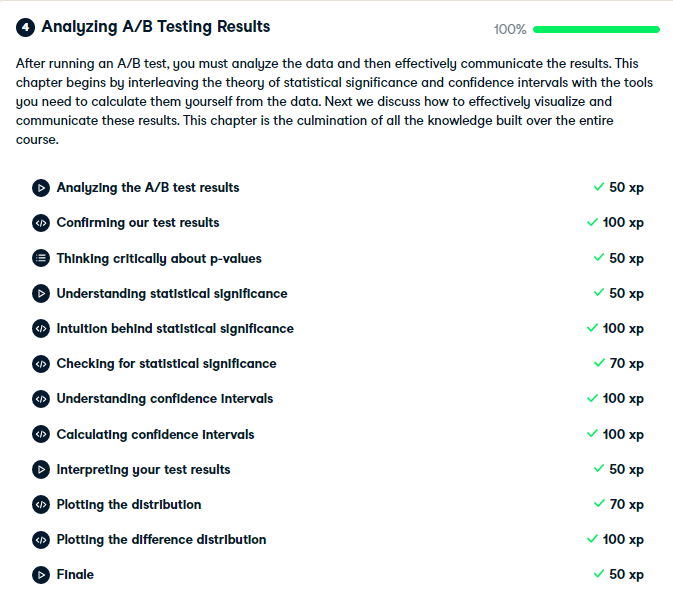